## 1. Create a new notebook and Test Tensorflow with the below python codes at colab.

In [1]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

## 2. Test Tensorflow with linear regressions.

In [2]:
import numpy as np
#Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)

In [3]:
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)
print(theta)

tf.Tensor(
[[-3.7144665e+01]
 [ 4.3637392e-01]
 [ 9.3933418e-03]
 [-1.0714764e-01]
 [ 6.4542186e-01]
 [-4.1016874e-06]
 [-3.7816020e-03]
 [-4.2341197e-01]
 [-4.3682083e-01]], shape=(9, 1), dtype=float32)


### Another simple way to test the same dataset's Linear Regression is

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load the California Housing Dataset
housing = fetch_california_housing()

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

#Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

#Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss}')

#Make predictions
predictions = model.predict(X_test_scaled)

Epoch 1/50
413/413 [==============================] - 3s 5ms/step - loss: 7.1303 - val_loss: 5.8591
Epoch 2/50
413/413 [==============================] - 3s 7ms/step - loss: 4.6253 - val_loss: 3.7824
Epoch 3/50
413/413 [==============================] - 3s 8ms/step - loss: 2.9721 - val_loss: 2.3987
Epoch 4/50
413/413 [==============================] - 2s 6ms/step - loss: 1.9015 - val_loss: 1.5356
Epoch 5/50
413/413 [==============================] - 2s 6ms/step - loss: 1.2527 - val_loss: 1.0392
Epoch 6/50
413/413 [==============================] - 2s 6ms/step - loss: 0.8914 - val_loss: 0.7792
Epoch 7/50
413/413 [==============================] - 2s 5ms/step - loss: 0.7072 - val_loss: 0.6572
Epoch 8/50
413/413 [==============================] - 4s 9ms/step - loss: 0.6197 - val_loss: 0.6036
Epoch 9/50
413/413 [==============================] - 2s 4ms/step - loss: 0.5784 - val_loss: 0.5789
Epoch 10/50
413/413 [==============================] - 2s 4ms/step - loss: 0.5571 - val_loss: 0.5668

## 3. Test tensorflow with MNIST (handwriting) dataset

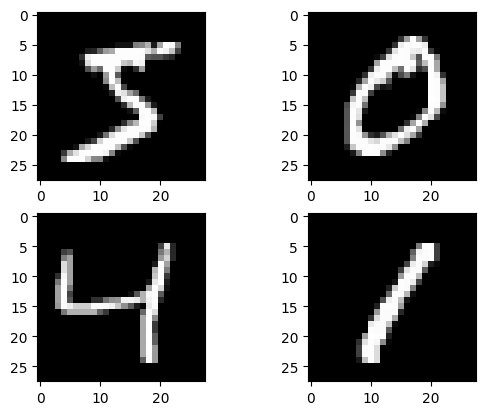

In [5]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

In [6]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 6s - loss: 0.2806 - accuracy: 0.9201 - val_loss: 0.1475 - val_accuracy: 0.9540 - 6s/epoch - 21ms/step
Epoch 2/10
300/300 - 8s - loss: 0.1125 - accuracy: 0.9676 - val_loss: 0.0952 - val_accuracy: 0.9708 - 8s/epoch - 26ms/step
Epoch 3/10
300/300 - 5s - loss: 0.0721 - accuracy: 0.9787 - val_loss: 0.0776 - val_accuracy: 0.9763 - 5s/epoch - 18ms/step
Epoch 4/10
300/300 - 6s - loss: 0.0503 - accuracy: 0.9852 - val_loss: 0.0722 - val_accuracy: 0.9799 - 6s/epoch - 20ms/step
Epoch 5/10
300/300 - 7s - loss: 0.0365 - accuracy: 0.9901 - val_loss: 0.0635 - val_accuracy: 0.9813 - 7s/epoch - 22ms/step
Epoch 6/10
300/300 - 6s - loss: 0.0263 - accuracy: 0.9932 - val_loss: 0.0626 - val_accuracy: 0.9802 - 6s/epoch - 20ms/step
Epoch 7/10
300/300 - 6s - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0614 - val_accuracy: 0.9816 - 6s/epoch - 19ms/step
Epoch 8/10
300/300 - 6s - loss: 0.0145 - accuracy: 0.9967 - val_loss: 0.0606 - val_accuracy: 0.9816 - 6s/epoch - 18ms/step
Epoch 9/10
300/3

### Another simple way to test the MNIST handwritting dataset

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

#Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#Build the Neural Network Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

#Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

#Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

#Predictions
predictions = model.predict(x_test)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2557 - accuracy: 0.9270 - val_loss: 0.1388 - val_accuracy: 0.9590
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1134 - accuracy: 0.9661 - val_loss: 0.0925 - val_accuracy: 0.9718
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0754 - accuracy: 0.9771 - val_loss: 0.0855 - val_accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0571 - accuracy: 0.9827 - val_loss: 0.0787 - val_accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0845 - val_accuracy: 0.9736
313/313 - 1s - loss: 0.0845 - accuracy: 0.9736 - 579ms/epoch - 2ms/step
Test accuracy: 0.9735999703407288
313/313 [==============================] - 1s 2ms/step


## 4.Derive the gradients for the below expressions:

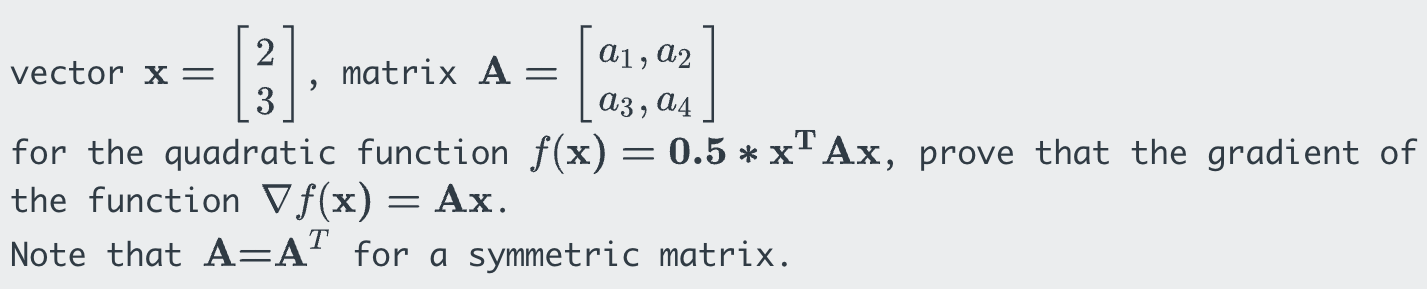

In [9]:
pip install numdifftools

In [10]:
#import modules
import numdifftools as nd
import numpy as np
import random

i = 0
while i<5:
  a1 = random.random()
  a2 = random.random()
  a3 = a2
  a4 = random.random()
  x = np.array([2,3]).T
  A = np.array([[a1,a2], [a3,a4]])
  f_x = lambda x: 0.5*(x.T*A*x)

  grad = nd.Gradient(f_x)([x])
  grad[0][0][1] = grad[0][1][1]
  grad[0][1][0] = grad[1][0][0]
  grad[0][1][1] = grad[1][1][1]

  print("Gradient calculated is: \n", grad[0])

  res = A * x
  print("The value of A*x is: \n", res)
  i += 1

Gradient calculated is: 
 [[1.38605786 0.84622187]
 [0.56414792 0.24393   ]]
The value of A*x is: 
 [[1.38605786 0.84622187]
 [0.56414792 0.24393   ]]
Gradient calculated is: 
 [[0.61240841 1.76473964]
 [1.17649309 2.93640302]]
The value of A*x is: 
 [[0.61240841 1.76473964]
 [1.17649309 2.93640302]]
Gradient calculated is: 
 [[1.84692808 1.0812239 ]
 [0.72081593 0.97837532]]
The value of A*x is: 
 [[1.84692808 1.0812239 ]
 [0.72081593 0.97837532]]
Gradient calculated is: 
 [[0.5862593  0.764839  ]
 [0.50989267 0.00473103]]
The value of A*x is: 
 [[0.5862593  0.764839  ]
 [0.50989267 0.00473103]]
Gradient calculated is: 
 [[0.80473001 1.7388566 ]
 [1.15923774 2.47188695]]
The value of A*x is: 
 [[0.80473001 1.7388566 ]
 [1.15923774 2.47188695]]
